In [79]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [80]:
text_list = read_text_folder("./module/dataset/")
print("document number:", len(text_list))

document number: 11


### 製作詞頻矩陣
**下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的fintextmin函式**

In [81]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}
## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)


In [83]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}

list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('防', 1),
 ('非洲', 2),
 ('豬瘟', 2),
 (' ', 2),
 ('陸', 1),
 ('港澳', 1),
 ('班機', 6),
 ('抵台', 1),
 ('出登', 1),
 ('機門', 1)]

In [84]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
dwf_list

[      0
 防     1
 非洲    2
 豬瘟    2
       2
 陸     1
 港澳    1
 班機    6
 抵台    1
 出登    1
 機門    1
 手提    4
 行李    3
 全面    1
 安檢    2
 （     1
 中央社   2
 記者    2
 邱俊欽   1
 桃園    3
 機場    3
 16    1
 日電    1
 ）     1
 國際    2
 防疫    4
 升級    1
 ，    17
 航空    3
 警察局   2
 表示    4
 ..   ..
 將     1
 配合    1
 國境    1
 在     1
 尚未    1
 增加    1
 額外    1
 警力    3
 前     1
 航警    1
 以同    1
 時段    1
 約     2
 33    1
 人     1
 執行    1
 各登機   1
 閘門    1
 口前    1
 航     1
 警局    1
 目前    1
 全天    1
 一天    1
 有     1
 112   1
 班     1
 將請示   1
 並協調   1
 支援    1
 
 [126 rows x 1 columns],        0
 撲      2
 殺      2
 91.6   2
 萬豬     1
 隻      1
 　      1
 中國     3
 農業部    1
 ：      2
 非洲     6
 豬瘟未    1
 蔓延     3
 農業     3
 農村部    2
 今天     1
 (      3
 15     2
 日      4
 )      3
 通報     5
 ，     38
 截至     1
 1      1
 月      2
 14     2
 曾      1
 有      2
 24     2
 個      4
 省份     3
 ...   ..
 水準     2
 他      1
 只要     1
 這三項    1
 做到     1
 就      1
 沒      1
 問題     2
 但現     1
 在    

In [85]:
wfm = pd.concat(dwf_list, axis= 1)
wfm

/Users/xin/anaconda3/envs/visualize_class/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,0,0,0,0,0,0,0,0,0,0
,2.0,NaN,27.0,1.0,8.0,NaN,1.0,10.0,NaN,1.0,1.0
!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
(,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
),NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
",",NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
.,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7.0,NaN,4.0,NaN
039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,NaN


In [86]:

wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

wfm # 詞頻矩陣完成

,,!,(,),",",-,.,039,0800,1,...,！,（,）,，,／,４,：,；,？,Ｅ
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,38.0,1.0,0.0,2.0,2.0,0.0,0.0
2,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0
7,10.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,...,3.0,4.0,4.0,66.0,0.0,1.0,0.0,2.0,12.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,3.0,...,4.0,4.0,4.0,38.0,1.0,0.0,1.0,4.0,0.0,0.0


In [37]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除 ## [使用 fintextmin 寫法]
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/Users/xin/anaconda3/envs/visualize_class/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,案例,檯,部新聞,說法,人心惶惶,開展,並出,無形,傳播,7,...,短缺,農畜,曾,設有,西北,解除,仍大買,情影響,以下,銷量
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [48]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,案例,檯,部新聞,說法,人心惶惶,開展,並出,無形,傳播,7,...,短缺,農畜,曾,設有,西北,解除,仍大買,情影響,以下,銷量
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.045451,0.000000,0.000000,0.045451,0.035722,...,0.000000,0.000000,0.045451,0.000000,0.039972,0.045451,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044854,...,0.000000,0.000000,0.000000,0.000000,0.050191,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052697,0.052697,0.000000,0.000000,...,0.000000,0.052697,0.000000,0.000000,0.000000,0.000000,0.000000,0.052697,0.000000,0.15809
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052987,0.000000,0.000000,0.000000,0.000000,0.000000,0.052987,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.059037,0.000000,0.059037,0.050463,0.000000,0.000000,0.000000,0.039660,...,0.000000,0.000000,0.050463,0.000000,0.044379,0.050463,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.050816,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.060266,0.030133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025757,0.020243,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060266,0.00000
8,0.000000,0.000000,0.000000,0.075663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [49]:
df_tfidf = evaluate_tfidf(wfm)
df_tfidf
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf
df_tfidf

,案例,檯,部新聞,說法,人心惶惶,開展,並出,無形,傳播,7,...,短缺,農畜,曾,設有,西北,解除,仍大買,情影響,以下,銷量
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.740363,0.000000,0.000000,0.740363,0.439333,...,0.000000,0.000000,0.740363,0.000000,0.564271,0.740363,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.439333,...,0.000000,0.000000,0.000000,0.000000,0.564271,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.041393,1.041393,0.000000,0.000000,...,0.000000,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,1.041393,0.000000,3.124178
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,1.041393,0.000000,0.000000,0.000000
5,0.000000,0.000000,1.041393,0.000000,1.041393,0.740363,0.000000,0.000000,0.000000,0.439333,...,0.000000,0.000000,0.740363,0.000000,0.564271,0.740363,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.082785,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.740363,0.439333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.082785,0.000000
8,0.000000,0.000000,0.000000,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:

first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('案例', 0.0),
 ('檯', 0.0),
 ('部新聞', 0.0),
 ('說法', 0.0),
 ('人心惶惶', 0.0),
 ('開展', 0.0),
 ('並出', 0.0),
 ('無形', 0.0),
 ('傳播', 0.0),
 ('7', 0.0)]

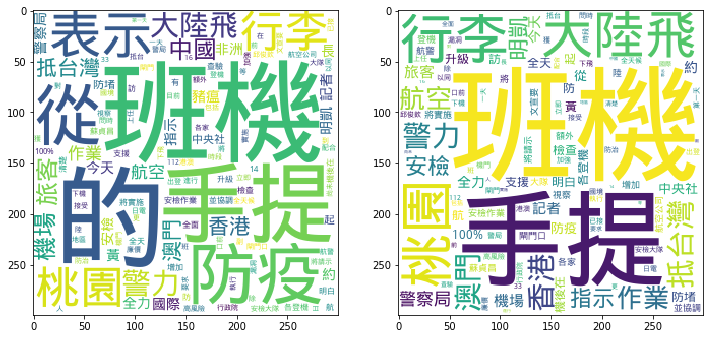

In [53]:


inux_font = r'./module/wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

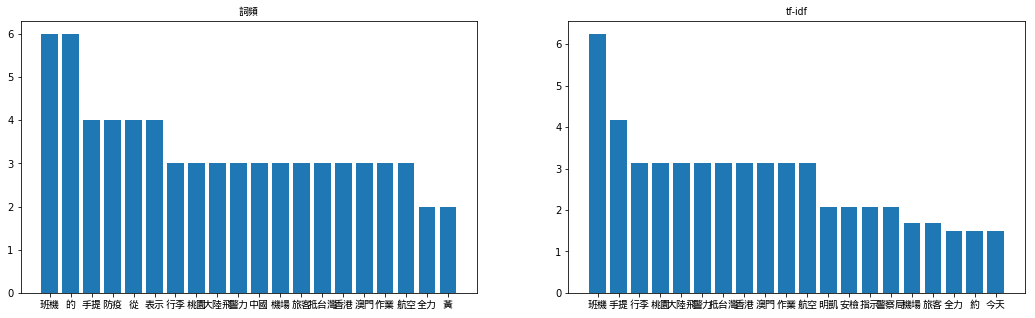

In [55]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")